In [5]:
using Pkg;

In [8]:
#Pkg.add("OrdinaryDiffEq")
#Pkg.add("Parameters")
#Pkg.status()

In [4]:
using Distributions 
using StatsBase
using CSV
using DataFrames
using StatsPlots
using Plots
gr()
using Dates
using OrdinaryDiffEq
using Parameters

In [5]:
file = download("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",
    "covid_19_global_data.csv");  

In [12]:
data_df =CSV.read("covid_19_global_data.csv",DataFrame); 
# read data from file into a DataFrame

In [10]:
@show typeof(data_df)

typeof(data_df) = DataFrame


DataFrame

In [47]:
data_df.Lat;
findfirst(data_df[:,"Country/Region"].=="Bolivia")

29

In [48]:
function fcountry(df,country::String)
    loc =  findfirst(df[:,"Country/Region"].== country)
    !isnothing(loc) && return df[loc,:]
    error("Error: country don't found.")
end

fcountry (generic function with 1 method)

In [49]:
#fcountry(data_df,"Bolivia")
@show typeof(fcountry(data_df,"Bolivia"))

typeof(fcountry(data_df, "Bolivia")) = DataFrameRow{DataFrame, DataFrames.Index}


DataFrameRow{DataFrame, DataFrames.Index}

In [13]:
#findfirst(data_df[:,"Country/Region"].=="Brazil")
#new_df=data_df[ismissing.(data_df[!,Symbol("Province/State")]), :] 
# keep only rows with missing entry for "Province/State", total numbers for countries can be read this way


In [50]:
data_df[29,:]

Row,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,⋯
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,⋯
29,missing,Bolivia,-16.2902,-63.5887,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,10,10,11,11,12,12,15,19,24,27,29,32,43,61,74,81,97,107,115,123,132,139,157,183,194,210,264,268,275,300,330,354,397,441,465,493,520,564,598,609,703,807,866,950,⋯


In [82]:
covidBol = DataFrame(data_df[29,5:end])


Row,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,⋯
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,⋯
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,10,10,11,11,12,12,15,19,24,27,29,32,43,61,74,81,97,107,115,123,132,139,157,183,194,210,264,268,275,300,330,354,397,441,465,493,520,564,598,609,703,807,866,950,1014,1053,1110,1167,⋯


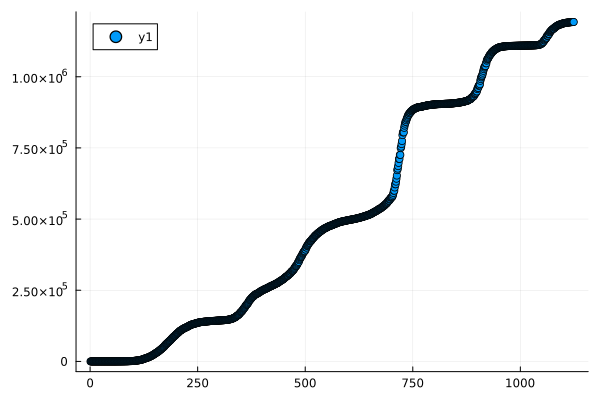

In [100]:
#@df covidBol scatter()
rows,cols =size(covidBol)
data_bo = stack(covidBol,5:cols)
 data_bo = data_bo[!,:value]
#@show data_bo
scatter(data_bo)


In [88]:
#?stack



In [15]:
function find_country(df,country::String)
    new_df=df[ismissing.(df[!,Symbol("Province/State")]), :] 
    # keep only rows with missing entry for "Province/State", total numbers for countries can be read this way            
    loc = findfirst(new_df[:,"Country/Region"].==country)
    return new_df[loc,:] 
end 

find_country (generic function with 1 method)

In [16]:
date_strings = names(data_df)[5:end];

In [17]:
format = Dates.DateFormat("m/d/y")

dateformat"m/d/y"

In [18]:
axisX =  parse.(Date,date_strings,format).+Year(2000);
axisX[1]
typeof(axisX[1])


Date

In [19]:
countries = ["Bolivia","Argentina","Chile","Peru","Colombia"]; 

In [20]:
abs_df = DataFrame()

0×0 DataFrame

In [21]:
for country in countries
    data_dfr = find_country(data_df,country);
    data_dfr = DataFrame(data_dfr);
    rows,cols = size(data_df);
    data_dfl = stack(data_dfr,5:cols);
    abs_df[!,Symbol("$country")] = data_dfl[!,:value]
end 

In [22]:
names(abs_df) 

5-element Vector{String}:
 "Bolivia"
 "Argentina"
 "Chile"
 "Peru"
 "Colombia"

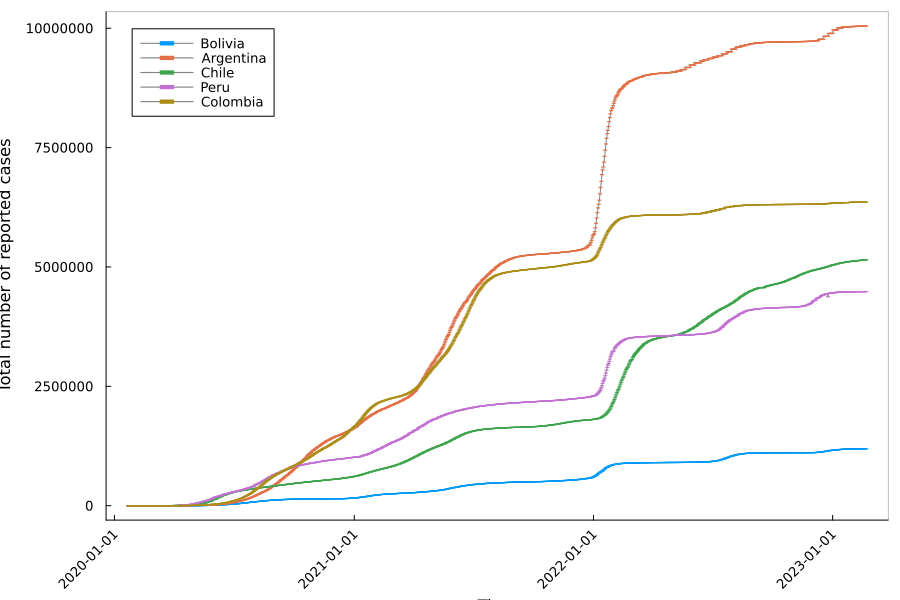

In [23]:
rows,cols = size(abs_df)

gr(size=(900,600))
@df abs_df plot(axisX, cols(1:cols), 
    label =  reshape(names(abs_df),(1,length(names(abs_df)))),
    xlabel = "Time",
    ylabel = "Total number of reported cases",
    #xticks =  axisX[1:50:end],
    xrotation = 45,
    marker = (:hline,2),
    line = (:line, "gray"),
    legend = :topleft,
    grid = false,
    framestyle = :semi,
    legendfontsize = 9,
    tickfontsize = 9,
    formatter = :plain
    )

In [25]:
file = download("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv", "covid_19_global_data_recovered.csv" );
# source of the data

data_df_recovered = CSV.read("covid_19_global_data_recovered.csv",DataFrame); 
# read data from file into a DataFrame

file = download("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv", "covid_19_global_data_deaths.csv" ); 
# source of the data  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

#data_df =CSV.read("covid_19_global_data.csv",DataFrame); 
data_df_deaths = CSV.read("covid_19_global_data_deaths.csv",DataFrame);
# read data from file into a DataFrame

In [26]:
#readdir()
#typeof(data_df_recovered)
first(data_df_recovered,5);
#findfirst(new_df[:,"Country/Region"].=="Bolivia")

In [27]:
countries = ["Bolivia","Argentina","Chile","Peru","Colombia"]; 
y, y_r, y_d = DataFrame(), DataFrame(), DataFrame() # separate empty dataframes to keep things simple

################## For total confirmed cases #####################
for country in countries    
    data_dfr = find_country(data_df,country); # returns a dataframe row 
    data_dfr = DataFrame(data_dfr);           # convert dataframe row back to a dataframe
    rows, cols = size(data_dfr);
    data_dfl = stack(data_dfr, 5:cols);       # convert dataframe into long format
    y[!,Symbol("$country")] = data_dfl[!,:value]

################## For total recovered cases #####################                              
    data_dfr_r = find_country(data_df_recovered,country); # returns a dataframe row 
    data_dfr_r = DataFrame(data_dfr_r);                   # convert dataframe row back to a dataframe
    rows, cols = size(data_dfr_r);
    data_dfl_r = stack(data_dfr_r, 5:cols);               # convert dataframe into long format
    y_r[!,Symbol("$country")] = data_dfl_r[!,:value]

################## For total deaths #####################
    
    data_dfr_d = find_country(data_df_deaths,country); # returns a dataframe row 
    data_dfr_d = DataFrame(data_dfr_d);                   # convert dataframe row back to a dataframe
    rows, cols = size(data_dfr_d);
    data_dfl_d = stack(data_dfr_d, 5:cols);               # convert dataframe into long format
    y_d[!,Symbol("$country")] = data_dfl_d[!,:value]
end


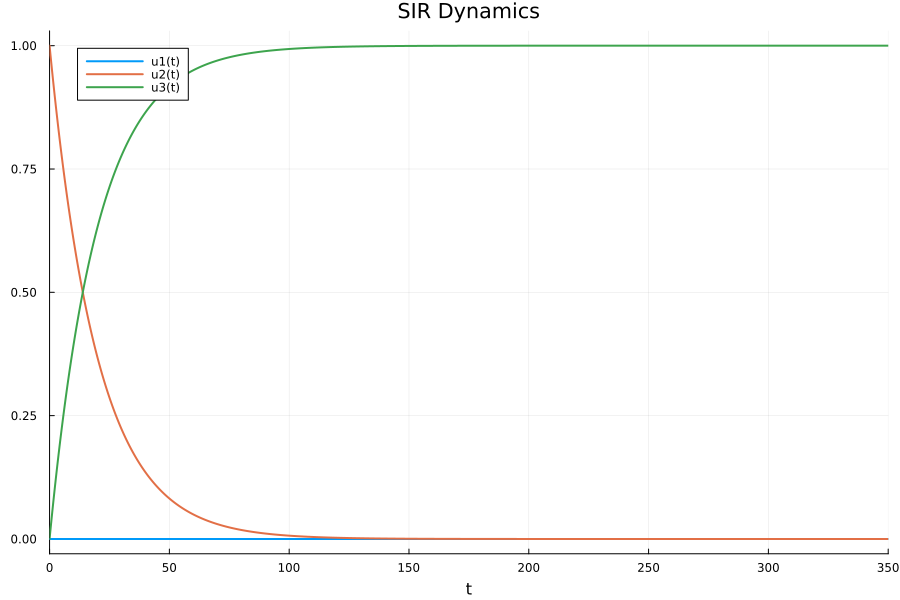